<a href="https://colab.research.google.com/github/mritu301/Machine-Learning/blob/master/Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tensor Flow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Each image is mapped to a single label. Since the class names are not included with the datasets,
# store them here to use later when plotting the images:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
# Displays the dimensions of the data
train_images.shape

(60000, 28, 28)

In [6]:
# Likewise, there are 60,000 labels in the training set:
len(train_labels)

60000

In [7]:
# Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# There are 10,000 images in the test set.
test_images.shape

(10000, 28, 28)

In [9]:
# And the test set contains 10,000 images labels:
len(test_labels)

10000

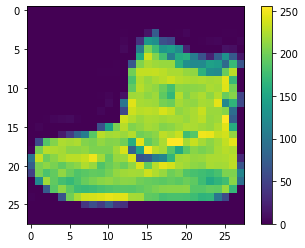

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

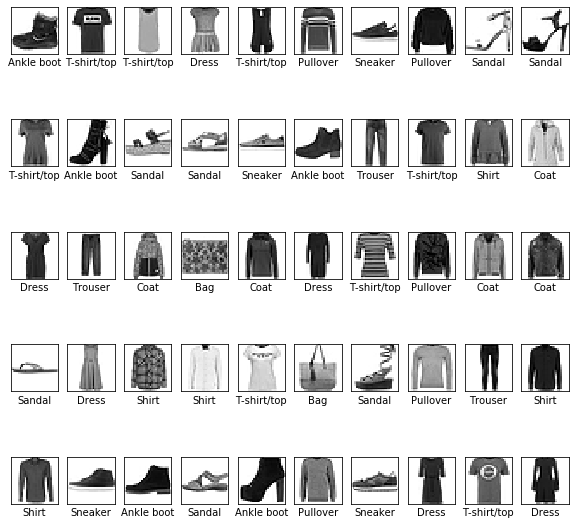

In [12]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])


In [13]:
  # Build the model
  model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(128, activation=tf.nn.relu),
                            keras.layers.Dense(10, activation=tf.nn.softmax)])
  
  model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# To start training, call the model.fit method :- The model is "fit" to the training data:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4985 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3733 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3358 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3094 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2922 - acc: 0.8921


In [16]:
# Next, compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy : ", test_acc)
print("Loss : ", test_loss)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3555 - acc: 0.8739
Test Accuracy :  0.8739
Loss :  0.35552439579963685


In [17]:
# With the model trained, we can use it to make predictions about some images.
predictions = model.predict(test_images)

# Here, the model has predicted the label for each images in the testing set.
# Let's take a look at the first prediction:

predictions[0]

array([7.5843354e-06, 3.3232400e-08, 1.8038659e-07, 4.3138186e-08,
       1.4851922e-06, 3.5732118e-03, 1.3448551e-05, 9.1699965e-02,
       2.2852901e-05, 9.0468115e-01], dtype=float32)

In [18]:
# Now find the maximum value
# The model is most confident to a image 
np.argmax(predictions[0])

9

In [19]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [20]:
test_labels[0]

9

In [0]:
# We can graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}%  ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
             color = color)
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


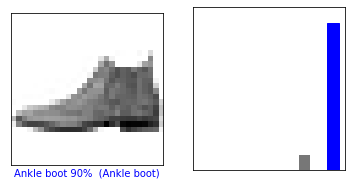

In [22]:
#  Let's look at the 0th image, predictions and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

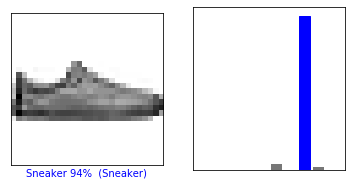

In [23]:
#  Let's look at the 0th image, predictions and prediction array.
# First image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

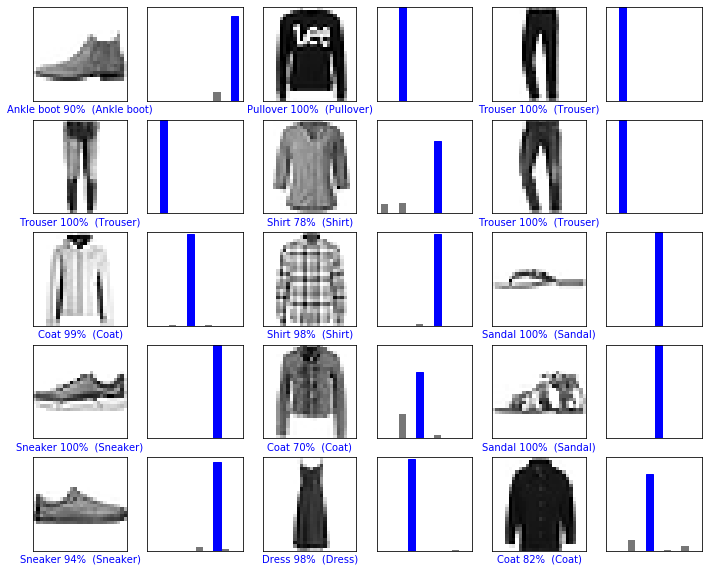

In [24]:
# Plot the several images with their predictions 
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [25]:
# Trained model to make prediction
# Finally, use the trained model to make a prediction about a single image
# Grab an image from the test dataset 

img = test_images[0]
print(img.shape)

(28, 28)


In [26]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# So even though we are using a single image, we need to add it to a list

# Add the image to batch where it is the only member
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


In [27]:
# Now predict the image
predictions_single = model.predict(img)
print(predictions_single)

[[7.5843150e-06 3.3232276e-08 1.8038644e-07 4.3138357e-08 1.4851895e-06
  3.5732090e-03 1.3448553e-05 9.1699861e-02 2.2852859e-05 9.0468127e-01]]


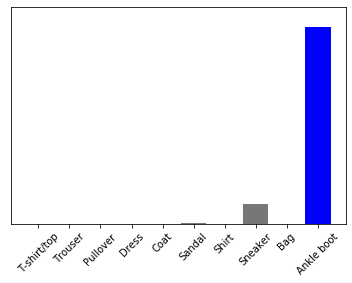

In [30]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

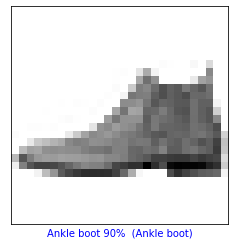

In [33]:
plot_image(0,predictions_single,test_labels,img)

In [34]:
# Display the output
np.argmax(predictions_single[0])

9